In [1]:
library(survival)
library(MASS)
library(openxlsx)
library(corrplot)

Warning message:
“package ‘survival’ was built under R version 3.6.2”
corrplot 0.84 loaded



In [2]:
library(psych)

In [3]:
# 警告メッセージ非表示
options(warn=-1)

In [4]:
df <- read.xlsx("../data/data_covid_fix_name.xlsx")
df <- na.omit(df)
head(df)

,country,pop,urb,gdp,dist,hf,pf,ef,date_first,detection,status,cumul,air
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Albania,2866376,60.319,13364.155,6996524,7.84,8.005411,7.67,70,74.3,1,108641,303.14
2,Algeria,42228429,72.629,15481.788,9108277,4.99,5.201489,4.77,58,12.0,1,80272,6442.44
3,Angola,30809762,65.514,6452.355,10490120,5.40,5.979936,4.83,83,17.9,1,303691,76.94
4,Argentina,44494502,91.870,20610.569,19025624,6.86,8.044600,5.67,65,74.9,1,92122,1516.63
6,Australia,24992369,86.012,51663.365,7608913,8.62,9.160533,8.07,26,97.3,1,1347,75667.65
7,Austria,8847037,58.297,55454.689,7103537,8.48,9.245685,7.71,58,73.2,1,80272,12935.50


In [5]:
# データを感染の大小で分ける
early_country <- df[df$date_first < 40, ]
late_country <- df[df$date_first > 40, ]

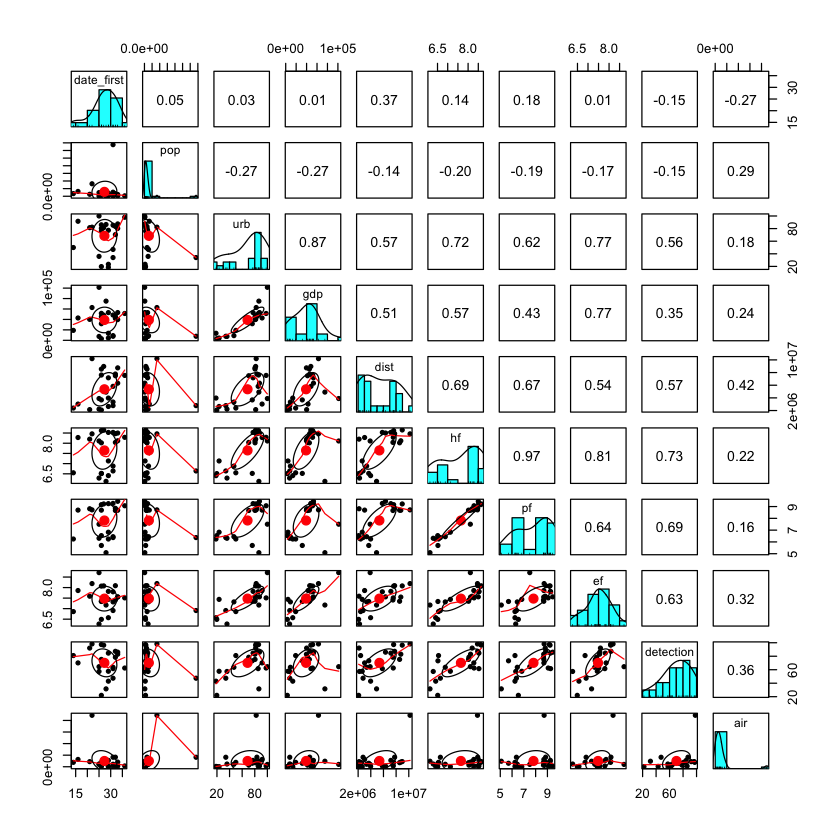

In [6]:
# 正規化なし
pairs.panels(early_country[c('date_first', 'pop', 'urb', 'gdp', 'dist', 'hf', 'pf', 'ef', 'detection', 'air')])

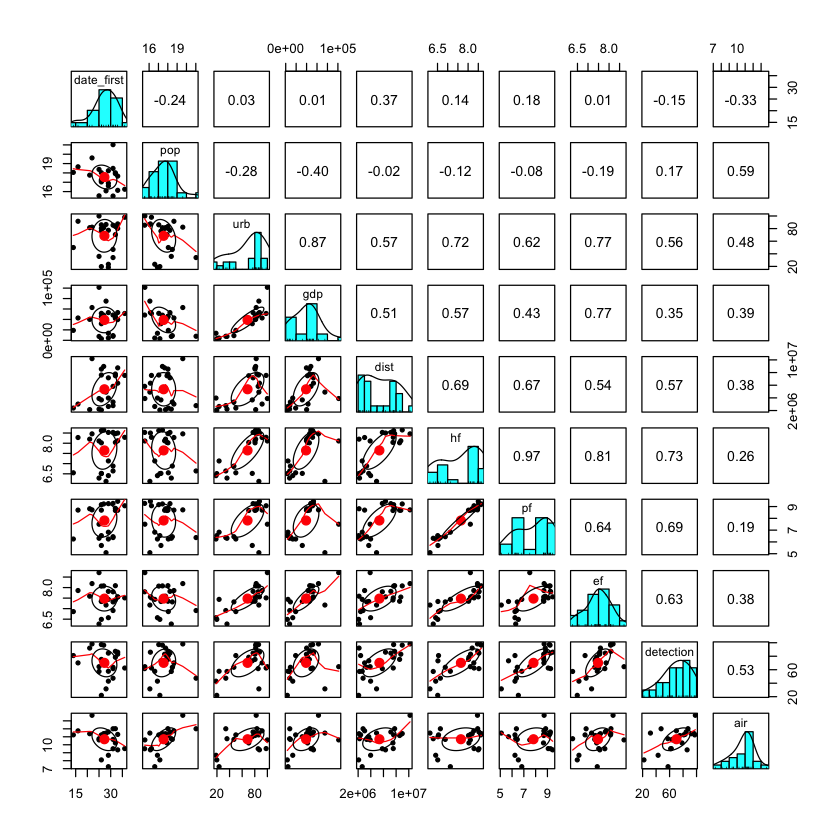

In [7]:
# 正規化あり
tmp <- early_country
tmp$air <- log(tmp$air )
tmp$pop <- log(tmp$pop )
pairs.panels(tmp[c('date_first', 'pop', 'urb', 'gdp', 'dist', 'hf', 'pf', 'ef', 'detection', 'air')])

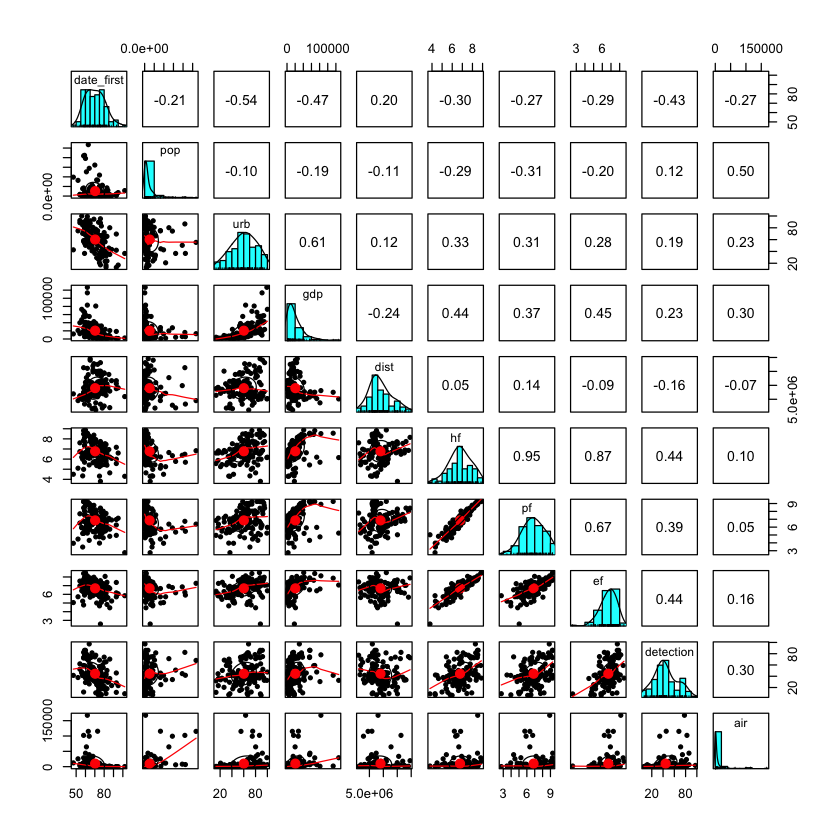

In [8]:
# 正規化なし
pairs.panels(late_country[c('date_first', 'pop', 'urb', 'gdp', 'dist', 'hf', 'pf', 'ef', 'detection', 'air')])

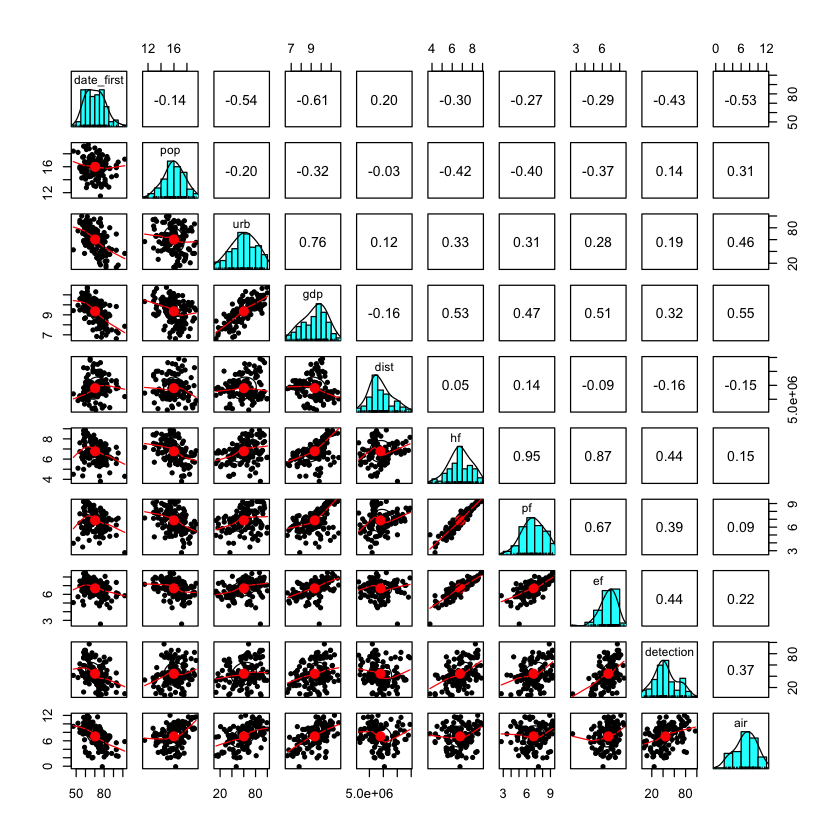

In [9]:
# 正規化あり
tmp <- late_country
tmp$air <- log(tmp$air )
tmp$pop <- log(tmp$pop )
tmp$gdp <- log(tmp$gdp )
pairs.panels(tmp[c('date_first', 'pop', 'urb', 'gdp', 'dist', 'hf', 'pf', 'ef', 'detection', 'air')])

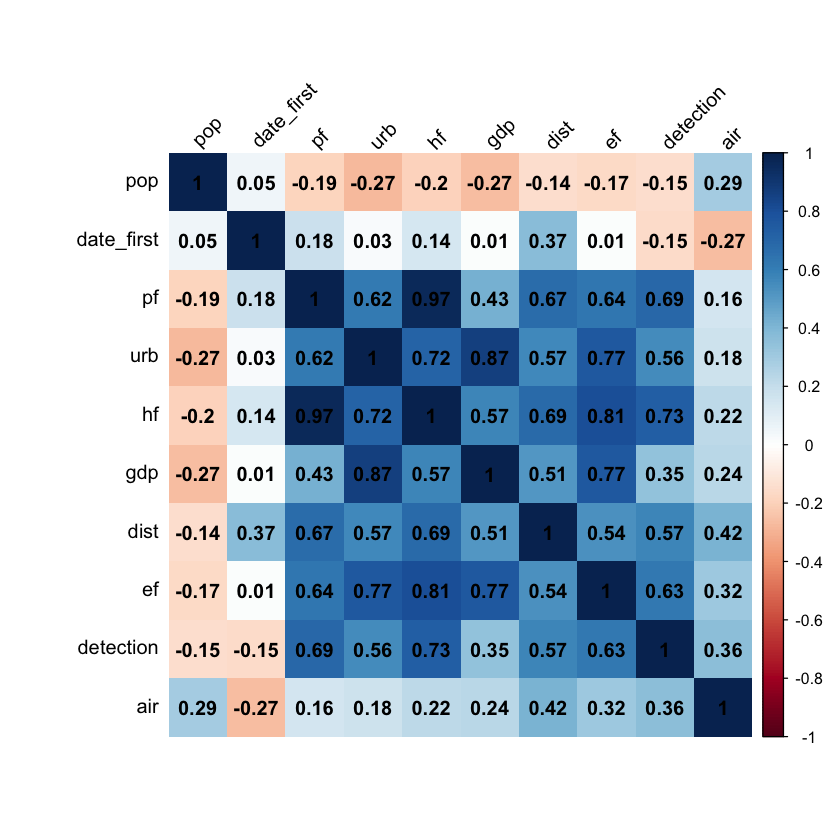

In [10]:
early_cor <- cor(early_country[c('date_first', 'pop', 'urb', 'gdp', 'dist', 'hf', 'pf', 'ef', 'detection', 'air')])
corrplot(early_cor, method="shade", shade.col=NA, tl.col="black", tl.srt=45,
         addCoef.col="black", order="AOE")

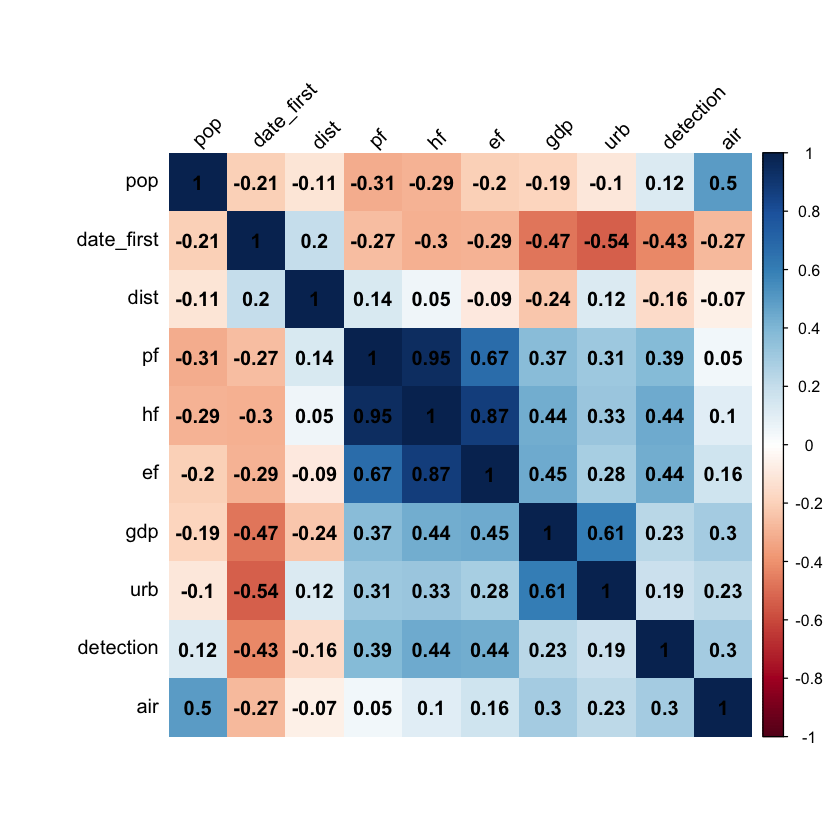

In [11]:
early_cor <- cor(late_country[c('date_first', 'pop', 'urb', 'gdp', 'dist', 'hf', 'pf', 'ef', 'detection', 'air')])
corrplot(early_cor, method="shade", shade.col=NA, tl.col="black", tl.srt=45,
         addCoef.col="black", order="AOE")

# 生存時間解析

In [12]:
Y_early <- Surv(early_country$date_first, early_country$status ==1)
Y_late <- Surv(late_country$date_first, late_country$status ==1)

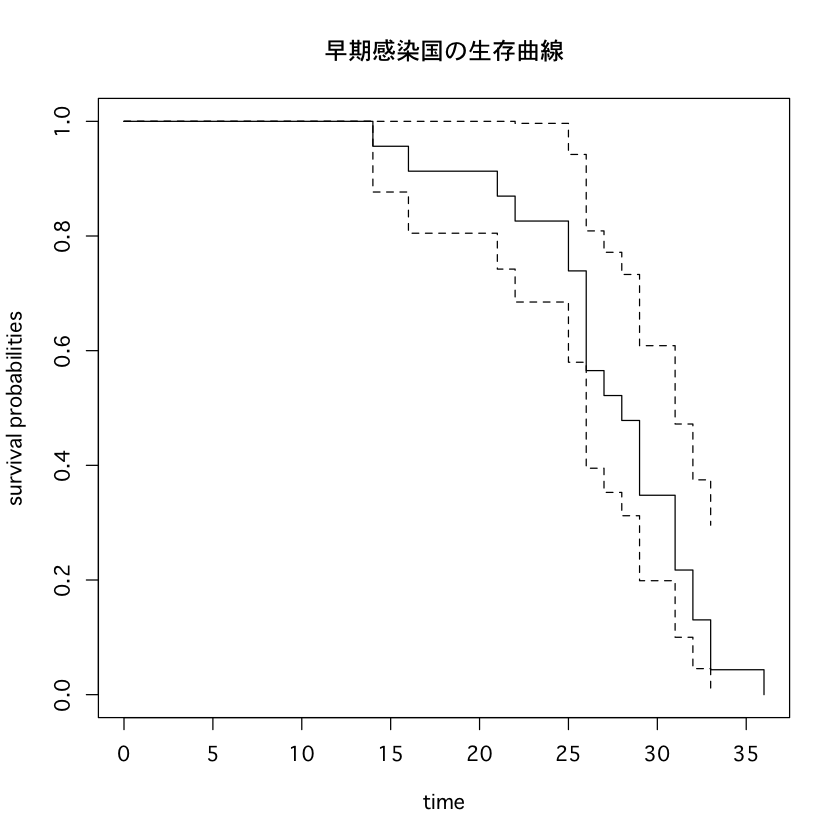

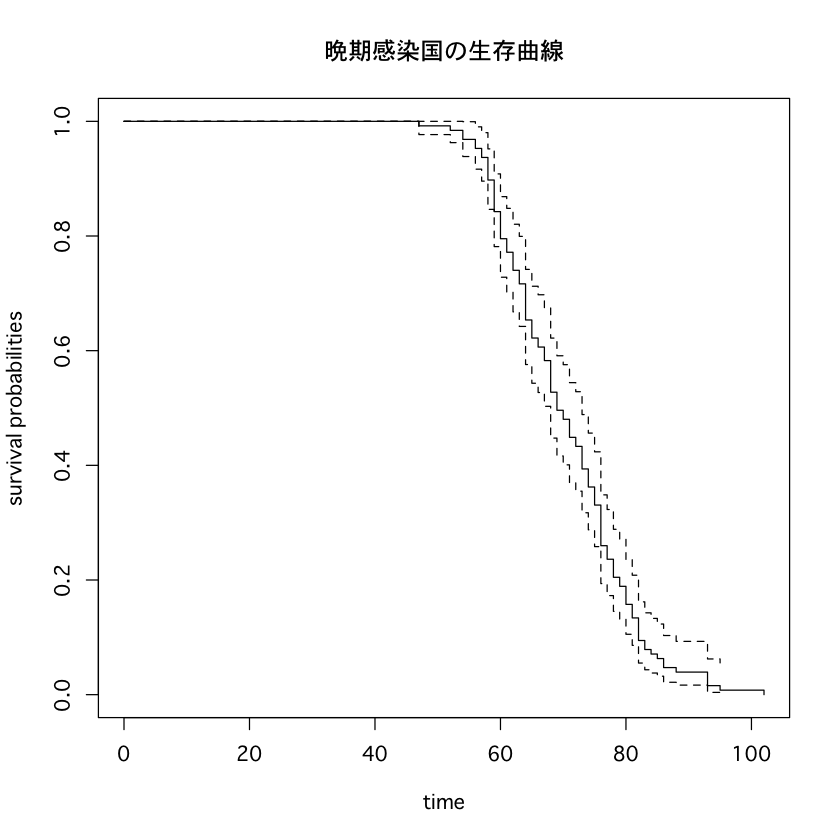

In [13]:
# KM
par(family="Osaka")
kmfit_early = survfit(Y_early ~ 1)
plot(kmfit_early,  mark.t=TRUE, xlab="time", ylab = "survival probabilities", main="早期感染国の生存曲線")

kmfit_late = survfit(Y_late ~ 1)
plot(kmfit_late,  mark.t=TRUE, xlab="time", ylab = "survival probabilities", main="晩期感染国の生存曲線")

## 早期感染国に対してのcox

### 正規化なし

In [14]:
stepAIC(coxph(Y_early ~ hf + pop + gdp + urb + dist + air + detection ,data = early_country))

Start:  AIC=96.86
Y_early ~ hf + pop + gdp + urb + dist + air + detection

            Df     AIC
- hf         1  95.375
- urb        1  95.427
<none>          96.857
- gdp        1  97.096
- pop        1  97.354
- detection  1  97.599
- air        1 101.535
- dist       1 105.566

Step:  AIC=95.38
Y_early ~ pop + gdp + urb + dist + air + detection

            Df     AIC
- urb        1  93.772
- gdp        1  95.167
<none>          95.375
- detection  1  95.908
- pop        1  96.524
- air        1 102.017
- dist       1 107.326

Step:  AIC=93.77
Y_early ~ pop + gdp + dist + air + detection

            Df     AIC
<none>          93.772
- detection  1  93.924
- gdp        1  93.952
- pop        1  95.189
- air        1 101.515
- dist       1 107.632


Call:
coxph(formula = Y_early ~ pop + gdp + dist + air + detection, 
    data = early_country)

                coef  exp(coef)   se(coef)      z        p
pop       -1.505e-09  1.000e+00  9.262e-10 -1.625 0.104223
gdp        1.844e-05  1.000e+00  1.172e-05  1.574 0.115526
dist      -7.272e-07  1.000e+00  1.954e-07 -3.721 0.000199
air        7.115e-06  1.000e+00  2.065e-06  3.445 0.000572
detection  2.307e-02  1.023e+00  1.638e-02  1.408 0.159167

Likelihood ratio test=19.44  on 5 df, p=0.00159
n= 23, number of events= 23 

In [15]:
model_early <-coxph(formula = Y_early ~ pop + gdp + dist + air + detection, data = early_country)
summary(model_early)
AIC(model_early)

Call:
coxph(formula = Y_early ~ pop + gdp + dist + air + detection, 
    data = early_country)

  n= 23, number of events= 23 

                coef  exp(coef)   se(coef)      z Pr(>|z|)    
pop       -1.505e-09  1.000e+00  9.262e-10 -1.625 0.104223    
gdp        1.844e-05  1.000e+00  1.172e-05  1.574 0.115526    
dist      -7.272e-07  1.000e+00  1.954e-07 -3.721 0.000199 ***
air        7.115e-06  1.000e+00  2.065e-06  3.445 0.000572 ***
detection  2.307e-02  1.023e+00  1.638e-02  1.408 0.159167    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

          exp(coef) exp(-coef) lower .95 upper .95
pop           1.000     1.0000     1.000     1.000
gdp           1.000     1.0000     1.000     1.000
dist          1.000     1.0000     1.000     1.000
air           1.000     1.0000     1.000     1.000
detection     1.023     0.9772     0.991     1.057

Concordance= 0.786  (se = 0.07 )
Likelihood ratio test= 19.44  on 5 df,   p=0.002
Wald test            = 15.71  on 5 df

[1] 93.77187

### 正規化あり

In [16]:
stepAIC(coxph(Y_early ~ hf + log(pop) + gdp + urb + dist + log(air) + detection ,data = early_country))

Start:  AIC=97.42
Y_early ~ hf + log(pop) + gdp + urb + dist + log(air) + detection

            Df     AIC
- hf         1  95.478
- gdp        1  97.297
<none>          97.425
- detection  1  98.373
- log(pop)   1  98.601
- log(air)   1 100.567
- urb        1 101.334
- dist       1 105.284

Step:  AIC=95.48
Y_early ~ log(pop) + gdp + urb + dist + log(air) + detection

            Df     AIC
<none>          95.478
- gdp        1  96.169
- log(pop)   1  97.523
- urb        1  99.534
- log(air)   1 100.686
- detection  1 100.940
- dist       1 104.623


Call:
coxph(formula = Y_early ~ log(pop) + gdp + urb + dist + log(air) + 
    detection, data = early_country)

                coef  exp(coef)   se(coef)      z       p
log(pop)  -9.439e-01  3.891e-01  4.891e-01 -1.930 0.05364
gdp        4.161e-05  1.000e+00  2.510e-05  1.658 0.09731
urb       -8.306e-02  9.203e-01  3.562e-02 -2.332 0.01970
dist      -5.576e-07  1.000e+00  1.721e-07 -3.241 0.00119
log(air)   1.268e+00  3.552e+00  5.016e-01  2.527 0.01151
detection  5.611e-02  1.058e+00  2.313e-02  2.426 0.01528

Likelihood ratio test=19.74  on 6 df, p=0.003086
n= 23, number of events= 23 

In [17]:
model_early <- coxph(formula = Y_early ~ log(pop) + gdp + urb + dist + log(air) + detection, data = early_country)
summary(model_early)
AIC(model_early)

Call:
coxph(formula = Y_early ~ log(pop) + gdp + urb + dist + log(air) + 
    detection, data = early_country)

  n= 23, number of events= 23 

                coef  exp(coef)   se(coef)      z Pr(>|z|)   
log(pop)  -9.439e-01  3.891e-01  4.891e-01 -1.930  0.05364 . 
gdp        4.161e-05  1.000e+00  2.510e-05  1.658  0.09731 . 
urb       -8.306e-02  9.203e-01  3.562e-02 -2.332  0.01970 * 
dist      -5.576e-07  1.000e+00  1.721e-07 -3.241  0.00119 **
log(air)   1.268e+00  3.552e+00  5.016e-01  2.527  0.01151 * 
detection  5.611e-02  1.058e+00  2.313e-02  2.426  0.01528 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

          exp(coef) exp(-coef) lower .95 upper .95
log(pop)     0.3891     2.5700    0.1492    1.0149
gdp          1.0000     1.0000    1.0000    1.0001
urb          0.9203     1.0866    0.8582    0.9868
dist         1.0000     1.0000    1.0000    1.0000
log(air)     3.5521     0.2815    1.3290    9.4940
detection    1.0577     0.9454    1.0108    1.10

[1] 95.47802

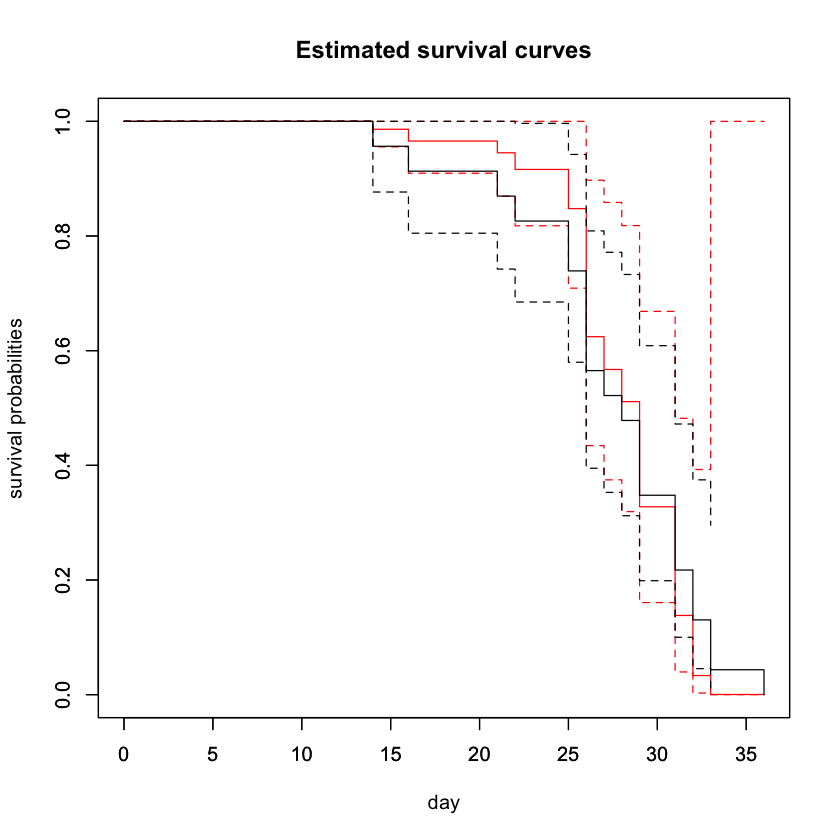

In [18]:
model_early.fit <- survfit(model_early)
plot(model_early.fit, col="red",  xlab="day",  ylab = "survival probabilities", main="Estimated survival curves")

 par(new=T) 
 plot(kmfit_early)     

In [19]:
# 比例ハザード性の確認(シェーンフィールド残差)
# 仮説が棄却されると比例ハザードの仮定が充たされていない可能性があることを示唆する。
zph_cluster1<- cox.zph(model_early)
zph_cluster1

            chisq df    p
log(pop)  0.74188  1 0.39
gdp       0.00845  1 0.93
urb       1.09748  1 0.29
dist      0.10559  1 0.75
log(air)  1.32184  1 0.25
detection 3.28004  1 0.07
GLOBAL    8.52631  6 0.20

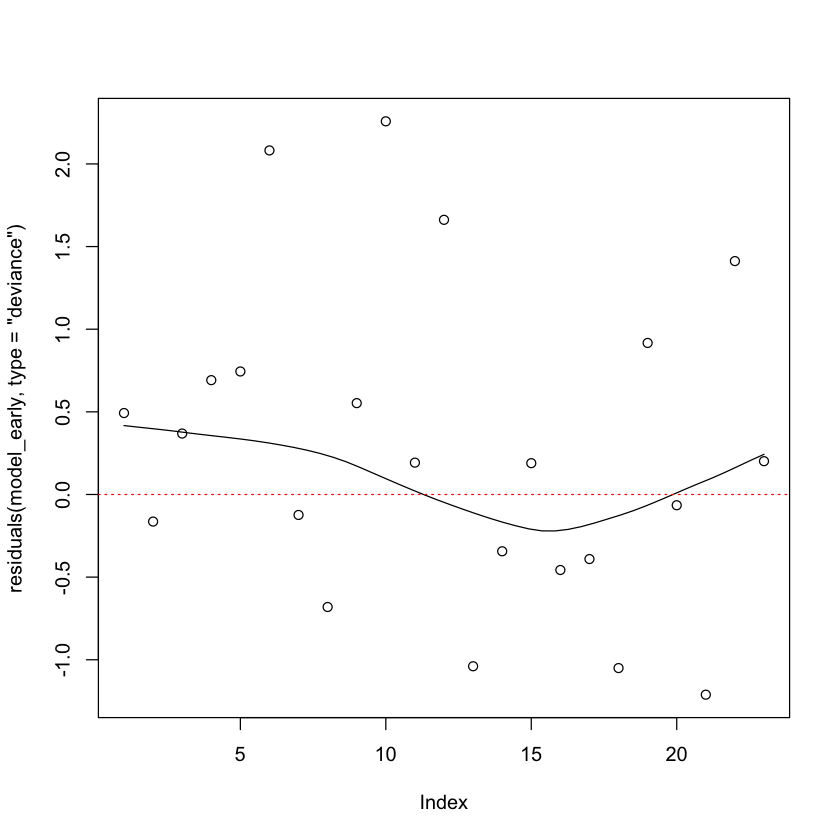

In [20]:
scatter.smooth(residuals(model_early, type="deviance"))
abline(h=0,lty=3,col=2)

## 晩期感染国に対してのcox

### 正規化なし

In [21]:
stepAIC(coxph(Y_late ~ hf + pop + gdp + urb + dist + air + detection ,data = late_country))

Start:  AIC=907.05
Y_late ~ hf + pop + gdp + urb + dist + air + detection

            Df    AIC
- dist       1 906.30
- air        1 906.92
<none>         907.05
- hf         1 911.38
- gdp        1 913.10
- detection  1 916.09
- urb        1 919.25
- pop        1 922.07

Step:  AIC=906.3
Y_late ~ hf + pop + gdp + urb + air + detection

            Df    AIC
- air        1 906.21
<none>         906.30
- hf         1 909.76
- detection  1 917.22
- urb        1 917.79
- gdp        1 917.88
- pop        1 922.56

Step:  AIC=906.21
Y_late ~ hf + pop + gdp + urb + detection

            Df    AIC
<none>         906.21
- hf         1 909.26
- detection  1 915.94
- gdp        1 916.02
- urb        1 917.02
- pop        1 921.86


Call:
coxph(formula = Y_late ~ hf + pop + gdp + urb + detection, data = late_country)

               coef exp(coef)  se(coef)     z        p
hf        2.372e-01 1.268e+00 1.087e-01 2.183 0.029064
pop       1.036e-08 1.000e+00 2.069e-09 5.006 5.55e-07
gdp       1.962e-05 1.000e+00 5.143e-06 3.814 0.000137
urb       1.936e-02 1.020e+00 5.410e-03 3.579 0.000345
detection 1.751e-02 1.018e+00 5.022e-03 3.486 0.000490

Likelihood ratio test=86.9  on 5 df, p=< 2.2e-16
n= 127, number of events= 127 

In [22]:
summary(coxph(formula = Y_late ~ hf + pop + gdp + urb + detection, data = late_country))
AIC(coxph(formula = Y_late ~ hf + pop + gdp + urb + detection, data = late_country))

Call:
coxph(formula = Y_late ~ hf + pop + gdp + urb + detection, data = late_country)

  n= 127, number of events= 127 

               coef exp(coef)  se(coef)     z Pr(>|z|)    
hf        2.372e-01 1.268e+00 1.087e-01 2.183 0.029064 *  
pop       1.036e-08 1.000e+00 2.069e-09 5.006 5.55e-07 ***
gdp       1.962e-05 1.000e+00 5.143e-06 3.814 0.000137 ***
urb       1.936e-02 1.020e+00 5.410e-03 3.579 0.000345 ***
detection 1.751e-02 1.018e+00 5.022e-03 3.486 0.000490 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

          exp(coef) exp(-coef) lower .95 upper .95
hf            1.268     0.7888     1.024     1.569
pop           1.000     1.0000     1.000     1.000
gdp           1.000     1.0000     1.000     1.000
urb           1.020     0.9808     1.009     1.030
detection     1.018     0.9826     1.008     1.028

Concordance= 0.762  (se = 0.018 )
Likelihood ratio test= 86.9  on 5 df,   p=<2e-16
Wald test            = 76.34  on 5 df,   p=5e-15
Score (logrank) te

[1] 906.2091

### 正規化あり

In [23]:
stepAIC(coxph(Y_late ~ hf + log(pop) + log(gdp) + urb + dist + log(air) + detection ,data = late_country))

Start:  AIC=905.73
Y_late ~ hf + log(pop) + log(gdp) + urb + dist + log(air) + detection

            Df    AIC
- log(air)   1 903.85
<none>         905.73
- dist       1 906.15
- detection  1 906.46
- log(gdp)   1 907.46
- urb        1 908.89
- hf         1 913.36
- log(pop)   1 918.66

Step:  AIC=903.85
Y_late ~ hf + log(pop) + log(gdp) + urb + dist + detection

            Df    AIC
<none>         903.85
- dist       1 904.31
- detection  1 904.97
- urb        1 906.98
- log(gdp)   1 907.35
- hf         1 911.43
- log(pop)   1 923.11


Call:
coxph(formula = Y_late ~ hf + log(pop) + log(gdp) + urb + dist + 
    detection, data = late_country)

                coef  exp(coef)   se(coef)      z        p
hf         3.815e-01  1.465e+00  1.284e-01  2.972  0.00296
log(pop)   3.493e-01  1.418e+00  7.644e-02  4.570 4.87e-06
log(gdp)   4.096e-01  1.506e+00  1.761e-01  2.326  0.02003
urb        1.942e-02  1.020e+00  8.659e-03  2.242  0.02493
dist      -4.357e-08  1.000e+00  2.788e-08 -1.563  0.11806
detection  9.401e-03  1.009e+00  5.278e-03  1.781  0.07492

Likelihood ratio test=91.25  on 6 df, p=< 2.2e-16
n= 127, number of events= 127 

In [24]:
model_late <- coxph(formula = Y_late ~ hf + log(pop) + log(gdp) + urb + dist + detection, data = late_country)


summary(model_late)
AIC(model_late)

Call:
coxph(formula = Y_late ~ hf + log(pop) + log(gdp) + urb + dist + 
    detection, data = late_country)

  n= 127, number of events= 127 

                coef  exp(coef)   se(coef)      z Pr(>|z|)    
hf         3.815e-01  1.465e+00  1.284e-01  2.972  0.00296 ** 
log(pop)   3.493e-01  1.418e+00  7.644e-02  4.570 4.87e-06 ***
log(gdp)   4.096e-01  1.506e+00  1.761e-01  2.326  0.02003 *  
urb        1.942e-02  1.020e+00  8.659e-03  2.242  0.02493 *  
dist      -4.357e-08  1.000e+00  2.788e-08 -1.563  0.11806    
detection  9.401e-03  1.009e+00  5.278e-03  1.781  0.07492 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

          exp(coef) exp(-coef) lower .95 upper .95
hf            1.465     0.6828    1.1388     1.883
log(pop)      1.418     0.7052    1.2208     1.647
log(gdp)      1.506     0.6639    1.0666     2.127
urb           1.020     0.9808    1.0024     1.037
dist          1.000     1.0000    1.0000     1.000
detection     1.009     0.9906    0.9991  

[1] 903.853

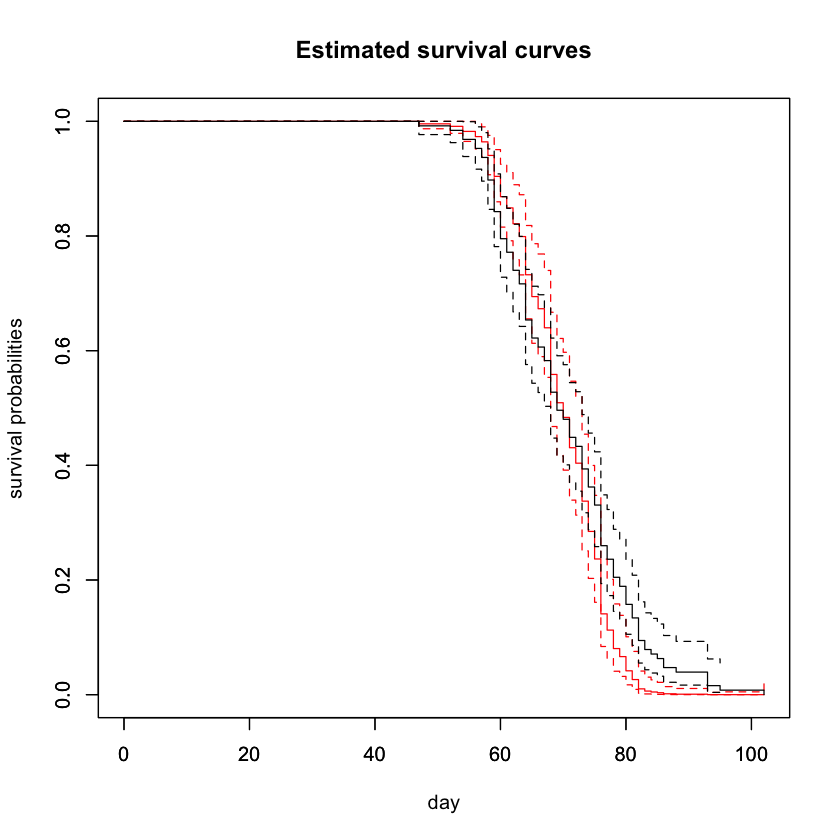

In [25]:
model_late.fit <- survfit(model_late)
plot(model_late.fit, col="red", xlab="day",  ylab = "survival probabilities", main="Estimated survival curves")

 par(new=T) 
 plot(kmfit_late)   

In [26]:
# 比例ハザード性の確認(シェーンフィールド残差)
# 仮説が棄却されると比例ハザードの仮定が充たされていない可能性があることを示唆する。
zph_cluster2<- cox.zph(model_late)
zph_cluster2

           chisq df      p
hf         2.390  1 0.1221
log(pop)   0.121  1 0.7277
log(gdp)   5.975  1 0.0145
urb        3.711  1 0.0541
dist       7.555  1 0.0060
detection  0.085  1 0.7706
GLOBAL    18.820  6 0.0045

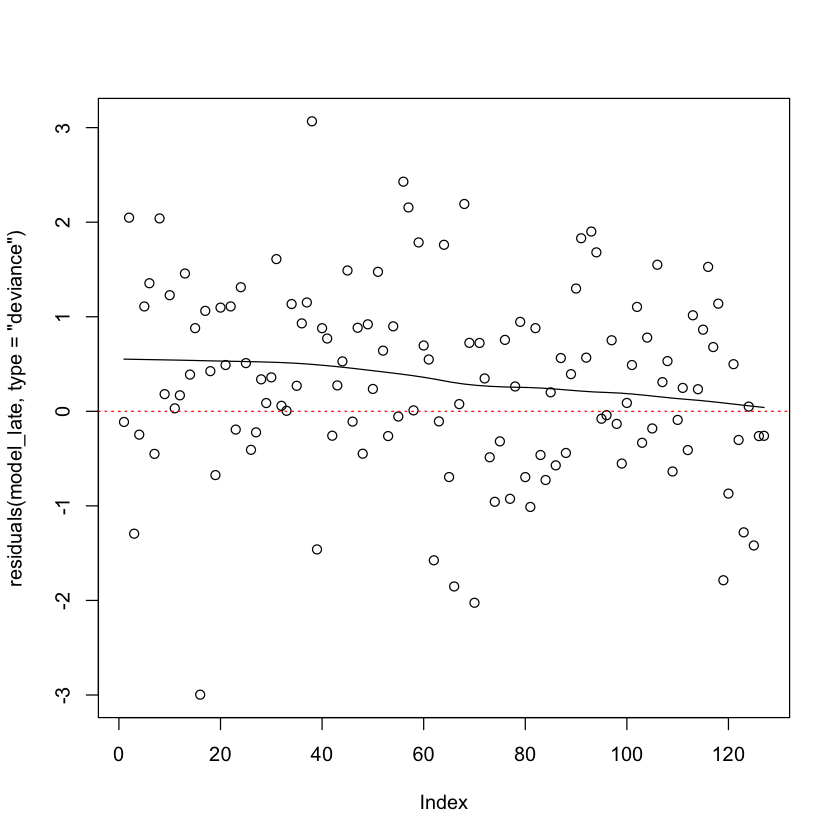

In [27]:
scatter.smooth(residuals(model_late, type="deviance"))
abline(h=0,lty=3,col=2)

In [28]:
as.data.frame(residuals(model_late, type="deviance"))

,"residuals(model_late, type = ""deviance"")"
,<dbl>
1,-0.11273150
2,2.04817390
3,-1.29433487
4,-0.24674470
7,1.10893951
8,1.35453407
9,-0.45030942
10,2.04014715
11,0.18177962


In [29]:
late_country

,country,pop,urb,gdp,dist,hf,pf,ef,date_first,detection,status,cumul,air
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Albania,2866376,60.319,13364.1554,6996524,7.84,8.005411,7.67,70,74.3,1,108641,303.14
2,Algeria,42228429,72.629,15481.7876,9108277,4.99,5.201489,4.77,58,12.0,1,80272,6442.44
3,Angola,30809762,65.514,6452.3552,10490120,5.40,5.979936,4.83,83,17.9,1,303691,76.94
4,Argentina,44494502,91.870,20610.5685,19025624,6.86,8.044600,5.67,65,74.9,1,92122,1516.63
7,Austria,8847037,58.297,55454.6893,7103537,8.48,9.245685,7.71,58,73.2,1,80272,12935.50
8,Azerbaijan,9942334,55.680,18044.1368,4849217,6.22,6.104661,6.34,61,45.0,1,84456,2279.55
9,Bahamas,385640,83.025,32087.7292,13276138,7.56,7.871205,7.25,77,21.8,1,166430,1197.12
10,Bahrain,1569439,89.287,47303.0485,5138295,6.63,5.910895,7.35,56,45.8,1,78620,5877.00
11,Bangladesh,161356039,36.632,4371.7550,1918841,5.77,5.365573,6.18,70,50.9,1,108641,5984.16


# 重回帰分析

### 早期感染国

In [57]:
step(lm(formula = date_first ~ hf + log(pop) + gdp+ urb + dist + log(air) + detection , data = early_country))

Start:  AIC=75.5
date_first ~ hf + log(pop) + gdp + urb + dist + log(air) + detection

            Df Sum of Sq    RSS    AIC
- hf         1     1.442 307.15 73.612
- gdp        1     3.856 309.56 73.792
- log(pop)   1     7.210 312.91 74.040
- urb        1    19.152 324.86 74.902
- detection  1    24.234 329.94 75.259
<none>                   305.71 75.504
- log(air)   1    28.183 333.89 75.532
- dist       1   178.704 484.41 84.091

Step:  AIC=73.61
date_first ~ log(pop) + gdp + urb + dist + log(air) + detection

            Df Sum of Sq    RSS    AIC
- log(pop)   1     5.940 313.09 72.053
- gdp        1     6.545 313.69 72.097
- urb        1    19.681 326.83 73.041
<none>                   307.15 73.612
- log(air)   1    37.773 344.92 74.280
- detection  1    58.703 365.85 75.635
- dist       1   193.354 500.50 82.843

Step:  AIC=72.05
date_first ~ gdp + urb + dist + log(air) + detection

            Df Sum of Sq    RSS    AIC
- urb        1    15.194 328.28 71.143
- gdp        1   


Call:
lm(formula = date_first ~ dist + log(air) + detection, data = early_country)

Coefficients:
(Intercept)         dist     log(air)    detection  
  4.257e+01    1.484e-06   -1.573e+00   -9.115e-02  


In [58]:
lm_early <- lm(formula = date_first ~ dist + log(air) + detection, data = early_country)
summary(lm_early)
AIC(lm_early)


Call:
lm(formula = date_first ~ dist + log(air) + detection, data = early_country)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.0553 -2.0220  0.3483  2.3807  7.5205 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.257e+01  6.805e+00   6.256 5.24e-06 ***
dist         1.484e-06  4.164e-07   3.565  0.00207 ** 
log(air)    -1.573e+00  7.416e-01  -2.121  0.04726 *  
detection   -9.115e-02  5.781e-02  -1.577  0.13137    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.19 on 19 degrees of freedom
Multiple R-squared:  0.4663,	Adjusted R-squared:  0.382 
F-statistic: 5.533 on 3 and 19 DF,  p-value: 0.006665


[1] 136.7773

### 晩期感染国

In [59]:
step(lm(date_first ~ hf + log(pop) + log(gdp) + urb + dist + log(air) + detection ,data = late_country))

Start:  AIC=500.58
date_first ~ hf + log(pop) + log(gdp) + urb + dist + log(air) + 
    detection

            Df Sum of Sq    RSS    AIC
- log(air)   1      0.00 5766.3 498.58
- hf         1     54.48 5820.7 499.77
<none>                   5766.3 500.58
- detection  1    137.44 5903.7 501.57
- dist       1    195.42 5961.7 502.81
- urb        1    286.73 6053.0 504.74
- log(gdp)   1    440.48 6206.7 507.93
- log(pop)   1    700.33 6466.6 513.14

Step:  AIC=498.58
date_first ~ hf + log(pop) + log(gdp) + urb + dist + detection

            Df Sum of Sq    RSS    AIC
- hf         1     54.54 5820.8 497.78
<none>                   5766.3 498.58
- detection  1    139.57 5905.8 499.62
- dist       1    195.71 5962.0 500.82
- urb        1    288.35 6054.6 502.78
- log(gdp)   1    545.54 6311.8 508.06
- log(pop)   1    960.74 6727.0 516.15

Step:  AIC=497.78
date_first ~ log(pop) + log(gdp) + urb + dist + detection

            Df Sum of Sq    RSS    AIC
<none>                   5820.8 497.78


Call:
lm(formula = date_first ~ log(pop) + log(gdp) + urb + dist + 
    detection, data = late_country)

Coefficients:
(Intercept)     log(pop)     log(gdp)          urb         dist    detection  
  1.453e+02   -1.938e+00   -3.854e+00   -1.147e-01    3.108e-07   -8.581e-02  


In [60]:
lm_late <- lm(formula = date_first ~ log(pop) + log(gdp) + urb + dist + detection, data = late_country)
summary(lm_late)
AIC(lm_late)


Call:
lm(formula = date_first ~ log(pop) + log(gdp) + urb + dist + 
    detection, data = late_country)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.9663  -4.9362  -0.0737   3.4829  23.3880 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.453e+02  1.173e+01  12.383  < 2e-16 ***
log(pop)    -1.938e+00  4.351e-01  -4.455 1.88e-05 ***
log(gdp)    -3.854e+00  9.737e-01  -3.958 0.000128 ***
urb         -1.147e-01  4.978e-02  -2.303 0.022971 *  
dist         3.108e-07  1.725e-07   1.802 0.074054 .  
detection   -8.581e-02  3.387e-02  -2.534 0.012568 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.936 on 121 degrees of freedom
Multiple R-squared:  0.5452,	Adjusted R-squared:  0.5264 
F-statistic: 29.01 on 5 and 121 DF,  p-value: < 2.2e-16


[1] 860.186